# CIFAR10 AISToS Kaggle Competition
---
Our team is composed by :
- Nick "Neocortical" Tsakiris
- George Spiropoulos
- Hercules Konsoulas




In [ ]:
# Importing base libraries
import matplotlib.pyplot as plt
import numpy as np
import csv

# Importing TF modules
import keras
import tensorflow as tf

from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization, Activation, Concatenate, AveragePooling2D, Input, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import *
from tensorflow.keras.models import Model

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Fix later
from  tensorflow.keras.callbacks import LearningRateScheduler, ReduceLROnPlateau

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Data Visualization

In [ ]:
print("Training dataset shape : ",x_train.shape)
print("Training dataset labels' shape : ",y_train.shape)

print("Test dataset shape : ",x_test.shape)
print("Test dataset labels' shape : ",y_test.shape)

Training dataset shape :  (50000, 32, 32, 3)
Training dataset labels' shape :  (50000, 1)
Test dataset shape :  (10000, 32, 32, 3)
Test dataset labels' shape :  (10000, 1)


In [ ]:
# MORE VISUALS PLS

# Prepping data

In [ ]:
def normalization(x_train, x_test, x_val):
    x_train = x_train.reshape(x_train.shape[0], # all 50000 images
                            x_train.shape[1], # width of 32
                            x_train.shape[2], # height of 32
                            3) # color channel
    x_train = x_train / 255.0 # normalize

    x_test = x_test.reshape(x_test.shape[0], # all 50000 images
                          x_test.shape[1], # width of 32
                          x_test.shape[2], # height of 32
                          3) # color channel
    x_test = x_test / 255.0 # normalize

    x_val = x_val.reshape(x_val.shape[0], # all 50000 images
                          x_val.shape[1], # width of 32
                          x_val.shape[2], # height of 32
                          3) # color channel
    x_val = x_val / 255.0 # normalize
    
    return x_train, x_test, x_val

In [ ]:
num_classes = 10
batch_size = 64
##### Should we split the data into validation and train? #####
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=.2)


# Data Normalization
x_train, x_test, x_val = normalization(x_train, x_test, x_val)

# Converting labels (class vectors) into binary matrices
t_train = keras.utils.to_categorical(y_train, num_classes)
t_test = keras.utils.to_categorical(y_test, num_classes)
t_val = keras.utils.to_categorical(y_val, num_classes)

# PCA

In [ ]:
#x_train

In [ ]:
"""from sklearn.decomposition import PCA

pca = PCA(n_components = 4)
x_train = pca.fit(x_train)"""

'from sklearn.decomposition import PCA\n\npca = PCA(n_components = 4)\nx_train = pca.fit(x_train)'

# Model Building

In [ ]:
import tensorflow as tf
#import seaborn as sns
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
#import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
#import itertools
tf.random.set_seed(42)

from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Conv2D, BatchNormalization, ReLU, Add, Dense
from tensorflow.keras.layers import AveragePooling2D, Flatten, MaxPooling2D, GlobalAveragePooling2D

import os
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras import optimizers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model
import numpy as np
from sklearn.model_selection import train_test_split

1

In [ ]:
def augmentation(x_train, y_train, batch_size):
  datagen = ImageDataGenerator(#horizontal_flip = True,
                               #vertical_flip= True,
                               rotation_range= 30,
                               #zoom_range = 0.2,
                               width_shift_range = 0.1,
                               height_shift_range = 0.1)
  
  it_train = datagen.flow(x_train,
                          y_train,
                          batch_size = batch_size)
  return it_train

iterator = augmentation(x_train, y_train, batch_size)

# InceptionV3

In [ ]:
def feature_extractor(inputs):
  return tf.keras.applications.InceptionV3(input_shape= (224, 224, 3),
                                               include_top = False)(inputs)

def incV3():
  inputs = Input(shape=(32, 32, 3))
  x = tf.keras.layers.UpSampling2D(size = (7, 7))(inputs)
  x = feature_extractor(x)
  x = GlobalAveragePooling2D()(x)
  x = Flatten()(x)
  x = Dense(1024, activation= 'relu')(x)
  x = Dense(512, activation= 'relu')(x)
  x = Dropout(.5)(x)
  outputs = Dense(10, activation = 'softmax')(x)
  model = Model(inputs, outputs)

  return model

In [ ]:
model = incV3()
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(learning_rate = 0.0001),
              metrics = ['acc'])

#ResNet50

In [ ]:
def feature_extractor(inputs):
  return tf.keras.applications.resnet.ResNet50(input_shape= (224, 224, 3),
                                               include_top = False)(inputs)

def res50():
  inputs = Input(shape=(32, 32, 3))
  x = tf.keras.layers.UpSampling2D(size = (7, 7))(inputs)
  x = feature_extractor(x)
  x = GlobalAveragePooling2D()(x)
  x = Flatten()(x)
  x = Dense(1024, activation= 'relu')(x)
  x = Dense(512, activation= 'relu')(x)
  x = Dropout(.5)(x)
  outputs = Dense(10, activation = 'softmax')(x)
  model = Model(inputs, outputs)

  return model

# Xception

In [ ]:
def feature_extractor(inputs):
  return tf.keras.applications.Xception(input_shape= (224, 224, 3),
                                               include_top = False)(inputs)

def xception():
  inputs = Input(shape=(32, 32, 3))
  x = tf.keras.layers.UpSampling2D(size = (7, 7))(inputs)
  x = feature_extractor(x)
  x = GlobalAveragePooling2D()(x)
  x = Flatten()(x)
  """x = Dense(1024, activation= 'relu')(x)
  x = Dense(512, activation= 'relu')(x)
  x = Dropout(.5)(x)"""
  outputs = Dense(10, activation = 'softmax')(x)
  model = Model(inputs, outputs)

  return model

In [ ]:
XC = xception()
XC.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(learning_rate = 0.0001),
              metrics = ['acc'])

# Model Summarization

In [ ]:
model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
up_sampling2d_8 (UpSampling2 (None, 224, 224, 3)       0         
_________________________________________________________________
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_7 ( (None, 2048)              0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_22 (Dense)             (None, 512)               5248

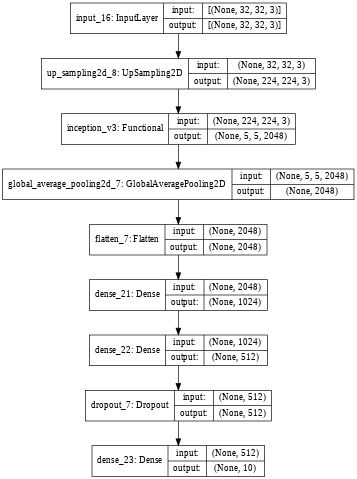

In [ ]:
plot_model(model, show_shapes=True, dpi=48)

# Fitting and Evaluation

In [ ]:
# Prepare model model saving directory
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'cifar10_% s_model.{epoch:03d}.h5'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)
  
# Prepare callbacks for model saving and for learning rate adjustment. 
checkpoint = ModelCheckpoint(filepath = filepath,
                             monitor ='val_acc',
                             verbose = 1,
                             save_best_only = True)

# Learning rate scheduler & Reduce on Plateau

def lr_schedule(epoch):
  lr = 1e-2
  if (epoch>140) :
      lr *= 0.5e-3
  elif epoch > 120:
      lr *= 1e-3
  elif epoch > 80:
      lr *= 1e-2
  elif epoch > 40:
      lr *= 1e-1
  return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               patience=5,
                               min_lr=0.5e-6,)

early_stopping = EarlyStopping(
    monitor="val_loss",
    #min_delta=0,
    patience=15,
    verbose=1,
    mode="auto",
    #baseline=None,
    restore_best_weights=True,
)
  
callbacks = [checkpoint,
             #lr_scheduler
             #lr_reducer,
             early_stopping 
             ]

# Inception

In [ ]:
epochs = 5

history = model.fit(x_train,
                    t_train,
                    epochs = epochs,
                    validation_data = (x_val, t_val),
                    batch_size = batch_size,
                    callbacks = callbacks)

Epoch 1/5
625/625 [==============================] - 869s 1s/step - loss: 0.6778 - acc: 0.7767 - val_loss: 0.2352 - val_acc: 0.9216

Epoch 00001: val_acc improved from -inf to 0.92160, saving model to /content/saved_models/cifar10_% s_model.001.h5
Epoch 2/5
625/625 [==============================] - 859s 1s/step - loss: 0.1211 - acc: 0.9632 - val_loss: 0.1713 - val_acc: 0.9450

Epoch 00002: val_acc improved from 0.92160 to 0.94500, saving model to /content/saved_models/cifar10_% s_model.002.h5
Epoch 3/5
625/625 [==============================] - 859s 1s/step - loss: 0.0701 - acc: 0.9775 - val_loss: 0.2190 - val_acc: 0.9382

Epoch 00003: val_acc did not improve from 0.94500
Epoch 4/5
625/625 [==============================] - 860s 1s/step - loss: 0.0559 - acc: 0.9827 - val_loss: 0.2046 - val_acc: 0.9437

Epoch 00004: val_acc did not improve from 0.94500
Epoch 5/5
625/625 [==============================] - 859s 1s/step - loss: 0.0421 - acc: 0.9868 - val_loss: 0.1885 - val_acc: 0.9467

Ep

# Evaluations & Predictions

In [ ]:
model = load_model('./saved_models/cifar10_% s_model.005.h5')
scores = model.evaluate(x_test, t_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 68s 212ms/step - loss: 0.1829 - acc: 0.9475
Test loss: 0.18293535709381104
Test accuracy: 0.9474999904632568


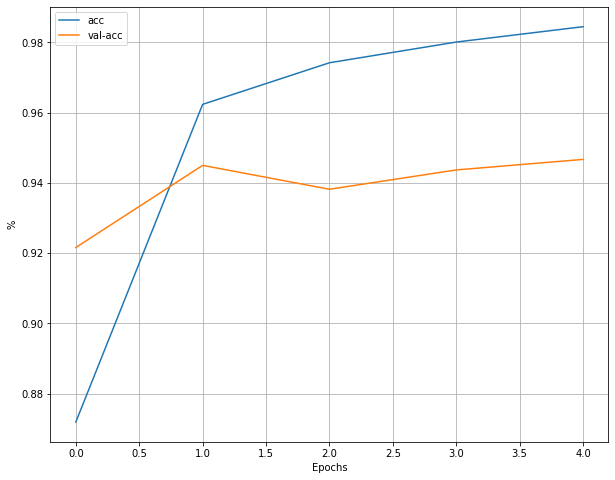

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('Epochs')
plt.ylabel('%')
plt.legend(('acc','val-acc'))
plt.grid(b=True)

# Predictions & CSV Creation

In [ ]:
predictions = model.predict(x_test)

In [ ]:
# Getting the class of the prediction
def getMaxIndex(list):
  maxim= max(list)
  for i in range(len(list)):
    if maxim == list[i]:
      return i

In [ ]:
# Creating a CSV file with the results
with open('Winning_Team_Submission.csv', mode='w') as submission_file:    # Not sure where this is created
    submission_file = csv.writer(submission_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)

    submission_file.writerow(['file_id', 'class_id'])
    file_id=0
    for i  in predictions:
      #print("image : {img} \t\tclass : {class_id}".format(img=file_id, class_id=getMaxIndex(i)))
      submission_file.writerow(['{img}'.format(img=file_id), '{class_id}'.format(class_id=getMaxIndex(i))])
      file_id+=1

print("Done")

Done
